# **Project Leyenda - Deliverable 2**

*Group* : 
|Author|Center|Promo|Mail| 
|---|---|---|---|
|De Jesus Correia Alexandre|Nanterre|FISE INFO A5|alexandre.dejesuscorreia@viacesi.fr|
|Charlut Steven|Nanterre|FISE INFO A5|steven.charlut@viacesi.fr|
|Debraize Killian|Nanterre|FISE INFO A5|killian.debraize@viacesi.fr|
|Raies Youssef|Nanterre|FISE INFO A5|youssef.raies@viacesi.fr|
|Kinya Mwongera Sharon|Nanterre|FISE INFO A5|sharon.kinyamwongera@viaceis.fr|

![denoizing](https://i.imgflip.com/96cuk7.jpg)

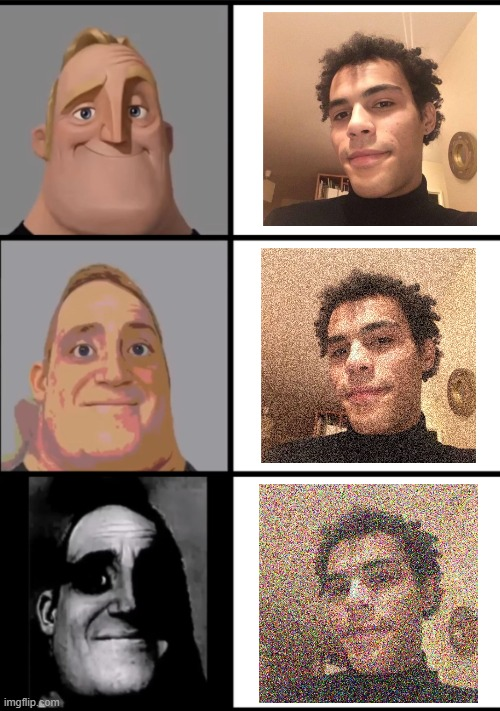


In [2]:
%matplotlib inline

In [3]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPooling2D, UpSampling2D, Input
from tensorflow.keras.models import Model
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os

# 1. File Loading Section
## Load the dataset 


In [4]:
# Load and preprocess images
def load_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder, filename))
        if img is not None:
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert to RGB
            img = cv2.resize(img, (128, 128))  # Resize for consistency
            images.append(img)
    return np.array(images)

In [5]:
# Function to load and resize images from a folder
def load_images_from_folder(folder, target_size=(128, 128)):
    images = []
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder, filename))
        if img is not None:
            # Resize the image to the target size
            img_resized = cv2.resize(img, target_size)
            images.append(img_resized)
    return np.array(images)

# Define the folder path
absolute_path = r"/Users/youssefraies/Desktop/Dev Projects/DataSciencePictureDesc/DataSets/data_set_livrable_2"

# Load dataset and resize images
dataset_images = load_images_from_folder(absolute_path, target_size=(128, 128))

# Normalize the data
dataset_images = dataset_images.astype('float32') / 255.0

# Now your images are loaded, resized, and normalized
print(f"Loaded {len(dataset_images)} images from the dataset.")

Loaded 148 images from the dataset.


In [6]:

# Split into training and test sets
train_images = dataset_images[:int(len(dataset_images) * 0.8)]
test_images = dataset_images[int(len(dataset_images) * 0.8):]

In [7]:
# Add noise to the images
noise_factor = 0.5
train_noisy = train_images + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=train_images.shape)
test_noisy = test_images + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=test_images.shape)
train_noisy = np.clip(train_noisy, 0., 1.)
test_noisy = np.clip(test_noisy, 0., 1.)

# Define the convolutional autoencoder
input_img = Input(shape=(128, 128, 3))

In [8]:
# Encoder
x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

# Decoder
x = Conv2D(64, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)

# Compile the autoencoder
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='mse')

In [9]:
# Summary of the model
autoencoder.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 128, 128, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 64, 64, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 32, 32, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d (UpSampling2D)    │ (None, 64, 64, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 64, 64, 32)     │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_1 (UpSampling2D)  │ (None, 128, 128, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 128, 128, 3)    │           867 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 75,651 (295.51 KB)

 Trainable params: 75,651 (295.51 KB)

 Non-trainable params: 0 (0.00 B)

In [10]:
# Train the autoencoder
history = autoencoder.fit(train_noisy, train_images,
                          epochs=50,
                          batch_size=32,
                          shuffle=True,
                          validation_data=(test_noisy, test_images))


Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 251ms/step - loss: 0.0787 - val_loss: 0.0662
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 229ms/step - loss: 0.0671 - val_loss: 0.0400
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 233ms/step - loss: 0.0404 - val_loss: 0.0255
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 222ms/step - loss: 0.0285 - val_loss: 0.0284
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 189ms/step - loss: 0.0299 - val_loss: 0.0260
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 196ms/step - loss: 0.0274 - val_loss: 0.0238
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 200ms/step - loss: 0.0268 - val_loss: 0.0257
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 190ms/step - loss: 0.0272 - val_loss: 0.0242
Epoch 9/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 191ms/step - loss: 0.0247 - val_loss: 0.0225
Epoch 10/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 185ms/step - loss: 0.0246 - val_loss: 0.0217
Epoch 11/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 186ms/step - loss: 0.0228 - val_loss: 0.0205
Epoch 12/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 197ms/step - loss: 0.0222 - val_lo

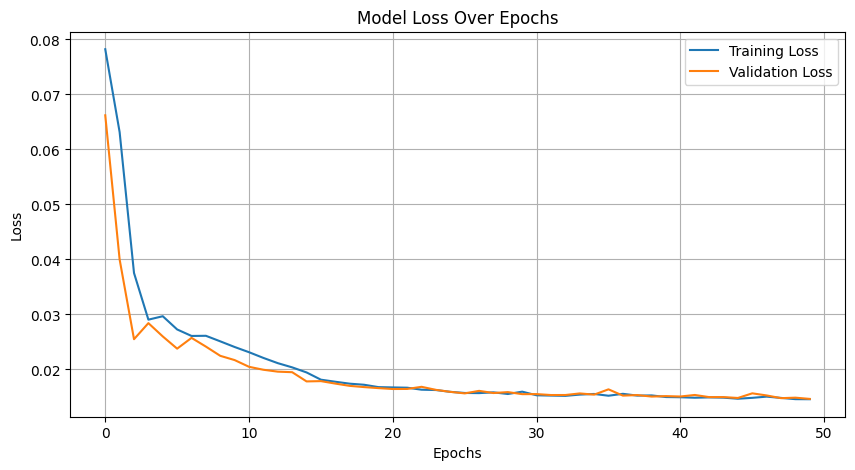

In [11]:
# Plot training & validation loss values
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


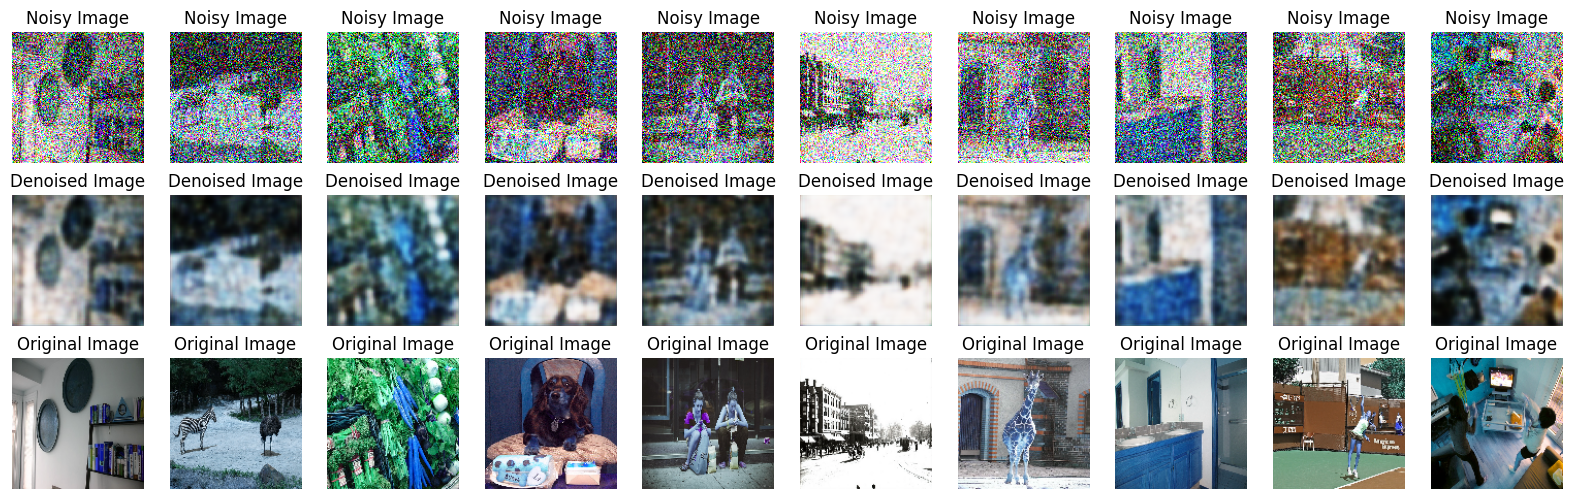

In [12]:
# Evaluate the autoencoder by comparing noisy images with denoised images
decoded_imgs = autoencoder.predict(test_noisy)

# Visualize the results
n = 10  # Number of images to display
plt.figure(figsize=(20, 6))
for i in range(n):
    # Display original noisy images
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(test_noisy[i])
    plt.title("Noisy Image")
    plt.axis("off")

    # Display denoised images
    ax = plt.subplot(3, n, i + n + 1)
    plt.imshow(decoded_imgs[i])
    plt.title("Denoised Image")
    plt.axis("off")

    # Display original images
    ax = plt.subplot(3, n, i + 2 * n + 1)
    plt.imshow(test_images[i])
    plt.title("Original Image")
    plt.axis("off")

plt.show()